In [3]:
#importing basic packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
#Loading the data
data0 = pd.read_csv('urldata.csv')
data0.head()

,Domain,Have_IP,Have_At,URL_Length,URL_Depth,Redirection,https_Domain,TinyURL,Prefix/Suffix,DNS_Record,Domain_Age,Domain_End,Label
0,graphicriver.net,0,0,1,1,0,0,0,0,0,1,1,0
1,ecnavi.jp,0,0,1,1,1,0,0,0,0,0,0,0
2,hubpages.com,0,0,1,1,0,0,0,0,0,0,1,0
3,extratorrent.cc,0,0,1,3,0,0,0,0,0,0,0,0
4,icicibank.com,0,0,1,3,0,0,0,0,0,0,1,0


In [5]:
#Checking the shape of the dataset
data0.shape

(1000, 13)

In [6]:
#Listing the features of the dataset
data0.columns

Index(['Domain', 'Have_IP', 'Have_At', 'URL_Length', 'URL_Depth',
       'Redirection', 'https_Domain', 'TinyURL', 'Prefix/Suffix', 'DNS_Record',
       'Domain_Age', 'Domain_End', 'Label'],
      dtype='object')

In [7]:
#Information about the dataset
data0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Domain         1000 non-null   object
 1   Have_IP        1000 non-null   int64 
 2   Have_At        1000 non-null   int64 
 3   URL_Length     1000 non-null   int64 
 4   URL_Depth      1000 non-null   int64 
 5   Redirection    1000 non-null   int64 
 6   https_Domain   1000 non-null   int64 
 7   TinyURL        1000 non-null   int64 
 8   Prefix/Suffix  1000 non-null   int64 
 9   DNS_Record     1000 non-null   int64 
 10  Domain_Age     1000 non-null   int64 
 11  Domain_End     1000 non-null   int64 
 12  Label          1000 non-null   int64 
dtypes: int64(12), object(1)
memory usage: 101.7+ KB


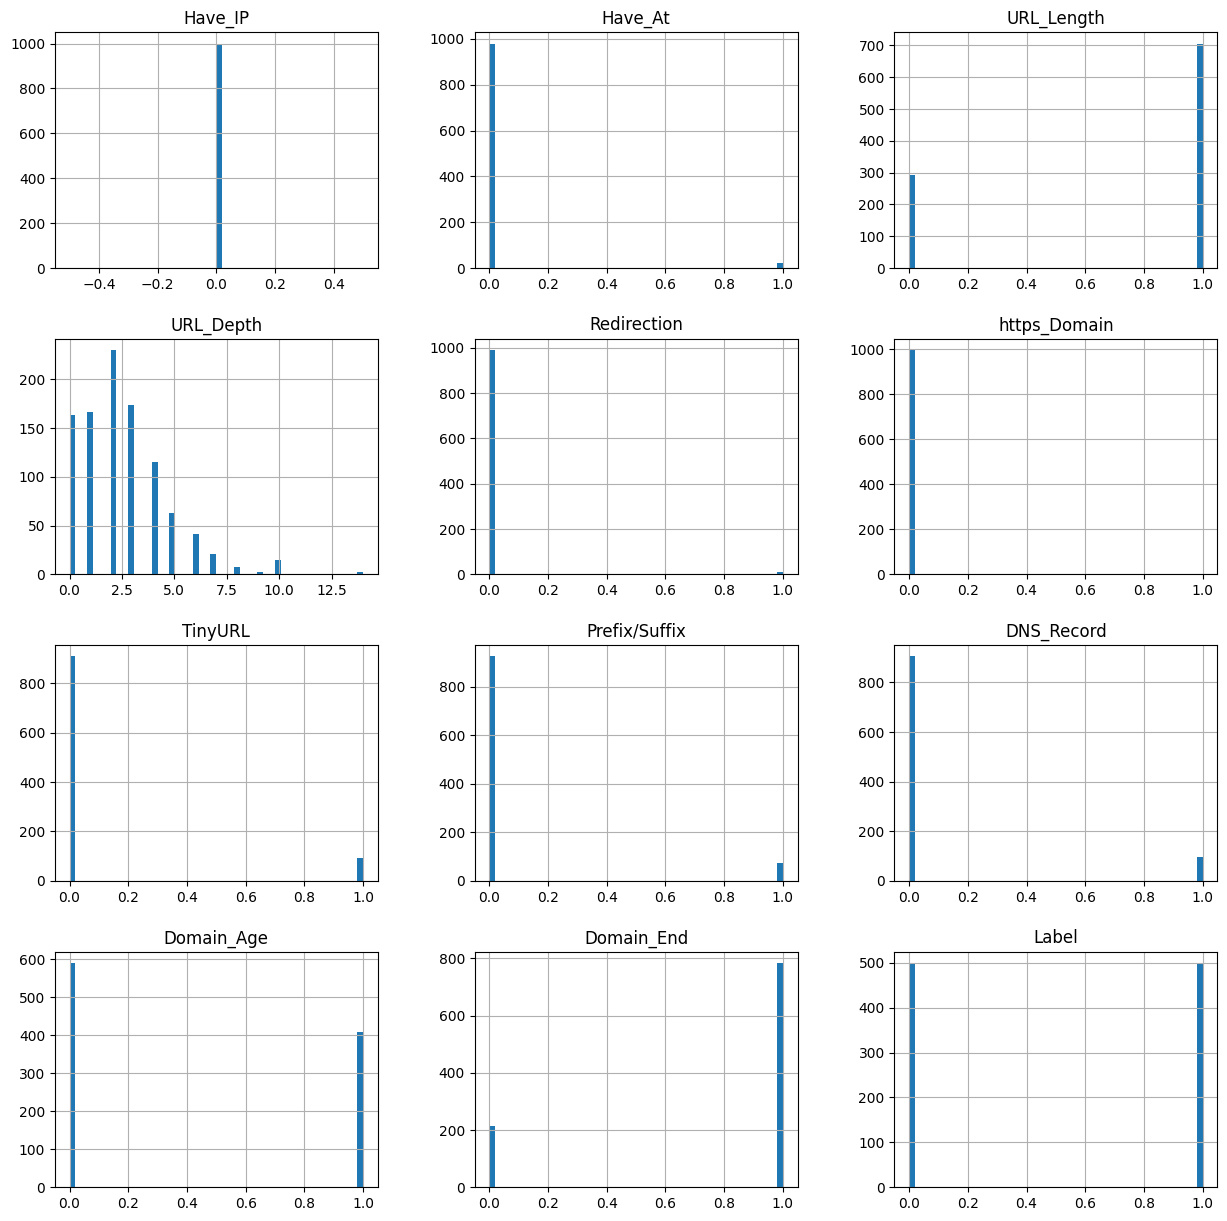

In [8]:
#Plotting the data distribution
data0.hist(bins = 50,figsize = (15,15))
plt.show()

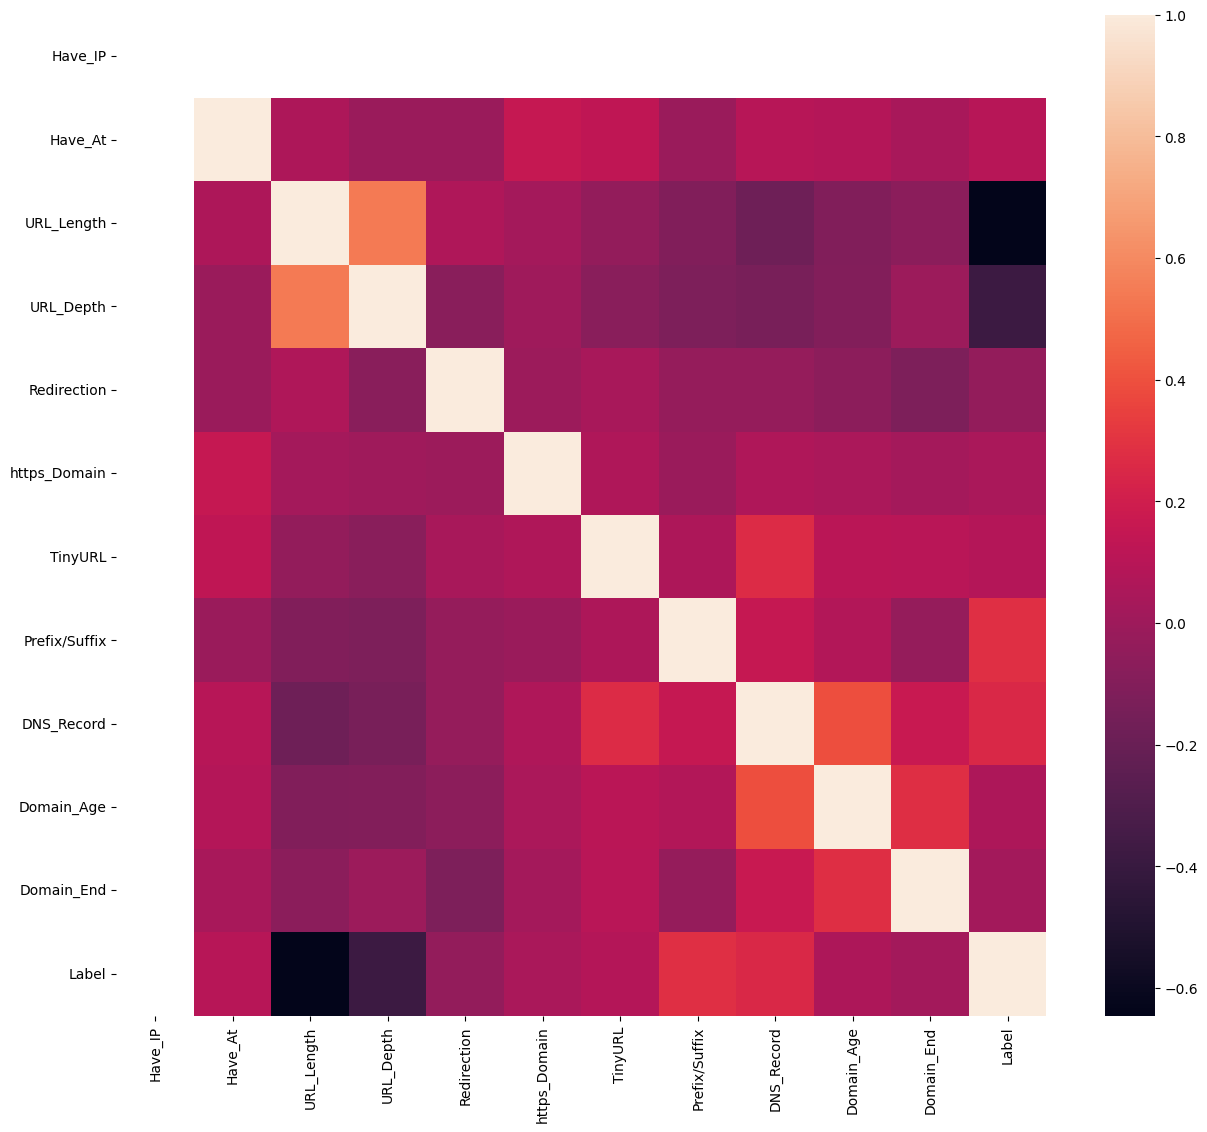

In [9]:
# Handle non-numerical columns before calculating correlation
data_numeric = data0.select_dtypes(include=['number'])  # Select only numerical columns
plt.figure(figsize=(15,13))
sns.heatmap(data_numeric.corr())  # Calculate correlation on numerical data
plt.show()

In [10]:
data0.describe()

,Have_IP,Have_At,URL_Length,URL_Depth,Redirection,https_Domain,TinyURL,Prefix/Suffix,DNS_Record,Domain_Age,Domain_End,Label
count,1000.0,1000.00000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,0.0,0.02000,0.70600,2.576000,0.010000,0.002000,0.091000,0.074000,0.095000,0.409000,0.785000,0.50000
std,0.0,0.14007,0.45582,2.122906,0.099549,0.044699,0.287753,0.261902,0.293362,0.491895,0.411028,0.50025
min,0.0,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,0.0,0.00000,0.00000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.00000
50%,0.0,0.00000,1.00000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.50000
75%,0.0,0.00000,1.00000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.00000
max,0.0,1.00000,1.00000,14.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000


In [11]:
#Dropping the Domain column
data = data0.drop(['Domain'], axis = 1).copy()

In [12]:
#checking the data for null or missing values
data.isnull().sum()

,0
Have_IP,0
Have_At,0
URL_Length,0
URL_Depth,0
Redirection,0
https_Domain,0
TinyURL,0
Prefix/Suffix,0
DNS_Record,0
Domain_Age,0


In [13]:
# shuffling the rows in the dataset so that when splitting the train and test set are equally distributed
data = data.sample(frac=1).reset_index(drop=True)
data.head()

,Have_IP,Have_At,URL_Length,URL_Depth,Redirection,https_Domain,TinyURL,Prefix/Suffix,DNS_Record,Domain_Age,Domain_End,Label
0,0,0,1,3,0,0,0,1,0,0,1,1
1,0,0,0,2,0,0,0,0,0,1,1,1
2,0,0,1,3,0,0,0,0,0,0,1,0
3,0,0,0,0,0,0,0,1,0,1,1,1
4,0,0,1,4,0,0,0,0,0,1,1,0


In [14]:
# Sepratating & assigning features and target columns to X & y
y = data['Label']
X = data.drop('Label',axis=1)
X.shape, y.shape

((1000, 11), (1000,))

In [15]:
# Splitting the dataset into train and test sets: 80-20 split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size = 0.2, random_state = 12)
X_train.shape, X_test.shape

((800, 11), (200, 11))

In [16]:
#importing packages
from sklearn.metrics import accuracy_score

In [17]:
# Creating holders to store the model performance results
ML_Model = []
acc_train = []
acc_test = []

#function to call for storing the results
def storeResults(model, a,b):
  ML_Model.append(model)
  acc_train.append(round(a, 3))
  acc_test.append(round(b, 3))

In [18]:
# Decision Tree model
from sklearn.tree import DecisionTreeClassifier

# instantiate the model
tree = DecisionTreeClassifier(max_depth = 5)
# fit the model
tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5)

In [19]:
#predicting the target value from the model for the samples
y_test_tree = tree.predict(X_test)
y_train_tree = tree.predict(X_train)

In [20]:
#computing the accuracy of the model performance
acc_train_tree = accuracy_score(y_train,y_train_tree)
acc_test_tree = accuracy_score(y_test,y_test_tree)

print("Decision Tree: Accuracy on training Data: {:.3f}".format(acc_train_tree))
print("Decision Tree: Accuracy on test Data: {:.3f}".format(acc_test_tree))

Decision Tree: Accuracy on training Data: 0.859
Decision Tree: Accuracy on test Data: 0.840


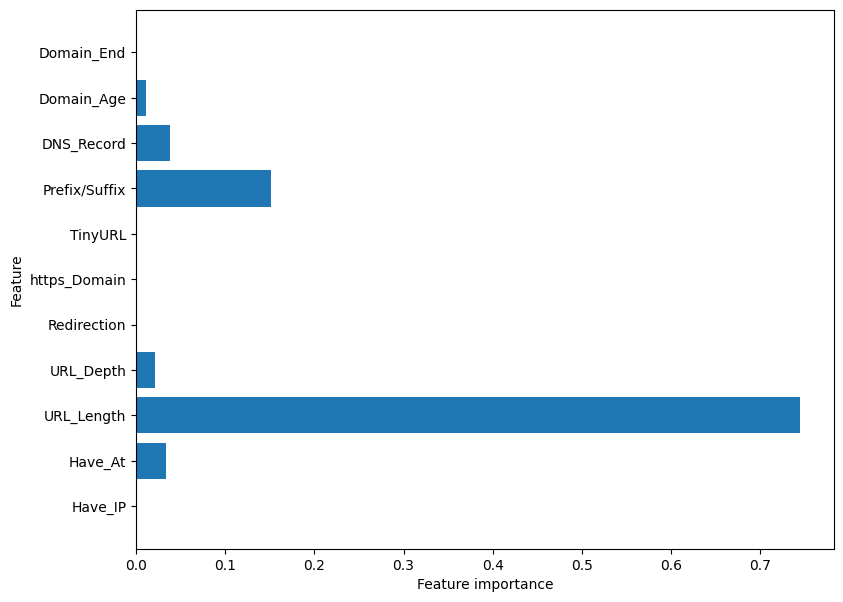

In [21]:
#checking the feature improtance in the model
plt.figure(figsize=(9,7))
n_features = X_train.shape[1]
plt.barh(range(n_features), tree.feature_importances_, align='center')
plt.yticks(np.arange(n_features), X_train.columns)
plt.xlabel("Feature importance")
plt.ylabel("Feature")
plt.show()

In [22]:
#storing the results. The below mentioned order of parameter passing is important.
#Caution: Execute only once to avoid duplications.
storeResults('Decision Tree', acc_train_tree, acc_test_tree)

In [23]:
#XGBoost Classification model
from xgboost import XGBClassifier

# instantiate the model
xgb = XGBClassifier(learning_rate=0.4,max_depth=7)
#fit the model
xgb.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.4, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=7, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [24]:
#predicting the target value from the model for the samples
y_test_xgb = xgb.predict(X_test)
y_train_xgb = xgb.predict(X_train)

In [25]:
#computing the accuracy of the model performance
acc_train_xgb = accuracy_score(y_train,y_train_xgb)
acc_test_xgb = accuracy_score(y_test,y_test_xgb)

print("XGBoost: Accuracy on training Data: {:.3f}".format(acc_train_xgb))
print("XGBoost : Accuracy on test Data: {:.3f}".format(acc_test_xgb))

XGBoost: Accuracy on training Data: 0.874
XGBoost : Accuracy on test Data: 0.840


In [26]:
#storing the results. The below mentioned order of parameter passing is important.
#Caution: Execute only once to avoid duplications.
storeResults('XGBoost', acc_train_xgb, acc_test_xgb)

In [27]:
#creating dataframe
results = pd.DataFrame({ 'ML Model': ML_Model,
    'Train Accuracy': acc_train,
    'Test Accuracy': acc_test})
results

,ML Model,Train Accuracy,Test Accuracy
0,Decision Tree,0.859,0.84
1,XGBoost,0.874,0.84


In [28]:
X_test.head()

,Have_IP,Have_At,URL_Length,URL_Depth,Redirection,https_Domain,TinyURL,Prefix/Suffix,DNS_Record,Domain_Age,Domain_End
518,0,0,0,0,0,0,0,0,1,1,1
871,0,0,1,4,0,0,0,0,0,0,1
797,0,0,1,6,0,0,0,0,0,1,1
274,0,0,1,4,0,0,0,0,0,0,0
325,0,0,0,0,0,0,0,0,0,0,1


In [29]:
import joblib

In [31]:
# Save the trained model to a file
joblib.dump(xgb, 'xgb_model.pkl')

['xgb_model.pkl']

In [32]:
# save XGBoost model to file
import pickle
pickle.dump(xgb, open("XGBoostClassifier.pickle.dat", "wb"))